Importing The Dpendencies 


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Pre-Processing 

In [ ]:
raw_mail_data = pd.read_csv("/content/mail_data.csv")



In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# get the number of variables
num_variables = len(raw_mail_data.columns)

# get the number of cells
num_cells = raw_mail_data.size

# get the number of rows
num_rows = len(raw_mail_data.index)

# get the variable types
variable_types = raw_mail_data.dtypes

# print the results
print(f"Number of variables: {num_variables}")
print(f"Number of cells: {num_cells}")
print(f"Number of rows: {num_rows}")
print(f"Variable types:\n{variable_types}")

Number of variables: 2
Number of cells: 11144
Number of rows: 5572
Variable types:
Category    object
Message     object
dtype: object


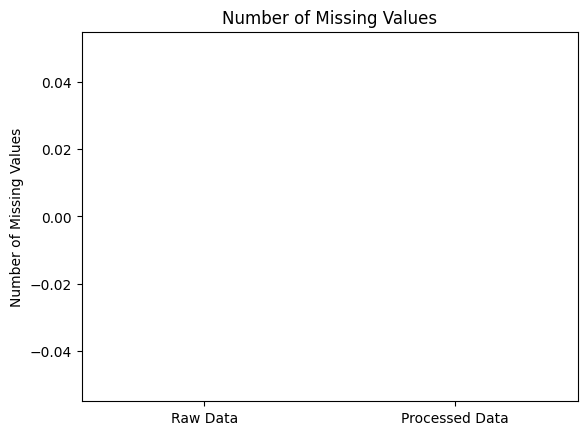

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the raw_mail_data
missing_raw = raw_mail_data.isna().sum()
missing_mail = mail_data.isna().sum()

plt.bar(['Raw Data', 'Processed Data'], [missing_raw.sum(), missing_mail.sum()])
plt.title('Number of Missing Values')
plt.ylabel('Number of Missing Values')
plt.show()


In [ ]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check in the number od rows and columns in the dataframe 
mail_data.shape

(5572, 2)

In [ ]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',]=0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',]=1

In [ ]:
X = mail_data['Message']
Y = mail_data['Category']

In [ ]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


training data and test 


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print( X_train_features)


  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features,Y_train)

LogisticRegression()

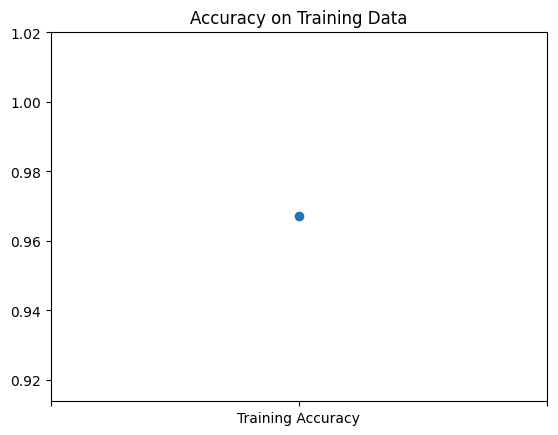

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have already trained a classification model
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

plt.plot([1], [accuracy_on_training_data], marker='o')
plt.xticks([0, 1, 2], [' ', 'Training Accuracy', ' '])
plt.title('Accuracy on Training Data')
plt.show()


In [ ]:
print('accuracy on training data :', accuracy_on_training_data)

accuracy on training data : 0.9670181736594121


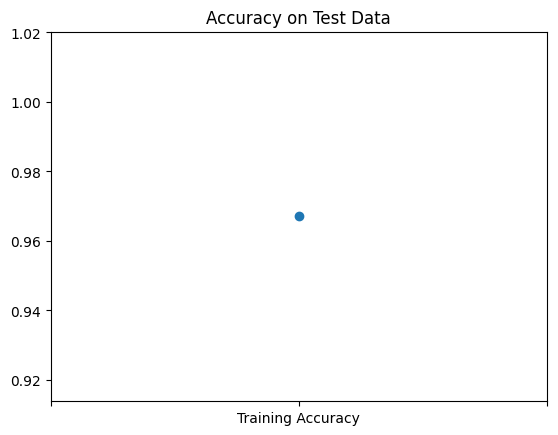

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test , prediction_on_test_data)

plt.plot([1], [accuracy_on_training_data], marker='o')
plt.xticks([0, 1, 2], [' ', 'Training Accuracy', ' '])
plt.title('Accuracy on Test Data')
plt.show()


In [ ]:
print('accuracy on test data :', accuracy_on_test_data)

accuracy on test data : 0.9659192825112107


In [ ]:
input_mail = [" txt> A to 8500 "]


#converte text to feature vectors 
input_data_features = feature_extraction.transform(input_mail)


#making prediction 
prediction = model.predict(input_data_features)

print(prediction)

if(prediction [0]==1):
  print('Ham mail')
else :
  print('Spam mail')




[0]
Spam mail
